In [219]:
import pandas as pd
import matplotlib as mplstyle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

burglary = ["#3498db", "#e74c3c"]
total_enr = ["#1b9e77", "#d95f02"]

In [220]:
crime = pd.read_csv('campus_crime.csv')

In [221]:
print(crime)

                              instname  total_enr  murder  manslaughter  \
0               American River College      95250       0             0   
1             Arizona State University     289016       0             0   
2                   Ashford University      74596       0             0   
3                    Auburn University      25469       0             0   
4    Austin Community College District    1082400       0             0   
..                                 ...        ...     ...           ...   
223             Wayne State University     123060       0             0   
224             Weber State University      25301       0             0   
225           West Virginia University      29617       0             0   
226        Western Kentucky University     126216       0             0   
227        Western Michigan University     250860       0             0   

     forcible  nonforce  robbery  agg_aslt  burglary  vehicle  arson  
0           1         2     

In [222]:
crime.describe()

,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson
count,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,1.082848e+05,0.021930,0.004386,3.995614,0.048246,1.728070,2.583333,23.793860,6.052632,0.820175
std,1.537517e+05,0.174224,0.066227,5.210543,0.234373,2.383072,3.545436,25.235744,8.105409,1.686468
min,2.016000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.949325e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000
50%,5.477800e+04,0.000000,0.000000,2.000000,0.000000,1.000000,1.500000,15.500000,3.000000,0.000000
75%,1.227450e+05,0.000000,0.000000,5.250000,0.000000,3.000000,4.000000,36.000000,8.000000,1.000000
max,1.323315e+06,2.000000,1.000000,30.000000,2.000000,19.000000,27.000000,118.000000,57.000000,11.000000


In [223]:
crime.sum()

instname        American River CollegeArizona State University...
total_enr                                                24688928
murder                                                          5
manslaughter                                                    1
forcible                                                      911
nonforce                                                       11
robbery                                                       394
agg_aslt                                                      589
burglary                                                     5425
vehicle                                                      1380
arson                                                         187
dtype: object

IDEA 1: Since the table is about the number of cases of different categories of crime happened on campus, the first question should be which kinds of crime have the highest number of reported cases. From the findings above, we can see that burglary accounts for most cases, followed by vehicle theft (2nd) and forcible sexual assault (3rd). 

The striking finding is that the number of burglary cases is much higher than the remaining categories. What's the reason for such weak property protection?

In [224]:
crime.assign(Total_crime = crime["murder"] + crime["manslaughter"] + crime["forcible"] + crime["nonforce"] + crime["robbery"] + crime["agg_aslt"] + crime["burglary"] + crime["vehicle"] + crime["arson"])

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,Total_crime
0,American River College,95250,0,0,1,2,3,2,6,8,0,22
1,Arizona State University,289016,0,0,17,1,11,27,90,17,11,174
2,Ashford University,74596,0,0,2,0,0,0,1,0,0,3
3,Auburn University,25469,0,0,1,0,2,0,22,3,0,28
4,Austin Community College District,1082400,0,0,0,0,0,1,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
223,Wayne State University,123060,0,0,2,0,3,2,18,8,2,35
224,Weber State University,25301,0,0,2,0,0,0,11,0,0,13
225,West Virginia University,29617,0,0,4,0,1,7,22,4,1,39
226,Western Kentucky University,126216,0,0,5,0,3,2,32,1,0,43


In [225]:
crime["Total_crime"] = crime["murder"] + crime["manslaughter"] + crime["forcible"] + crime["nonforce"] + crime["robbery"] + crime["agg_aslt"] + crime["burglary"] + crime["vehicle"] + crime["arson"]

In [226]:
print(crime)

                              instname  total_enr  murder  manslaughter  \
0               American River College      95250       0             0   
1             Arizona State University     289016       0             0   
2                   Ashford University      74596       0             0   
3                    Auburn University      25469       0             0   
4    Austin Community College District    1082400       0             0   
..                                 ...        ...     ...           ...   
223             Wayne State University     123060       0             0   
224             Weber State University      25301       0             0   
225           West Virginia University      29617       0             0   
226        Western Kentucky University     126216       0             0   
227        Western Michigan University     250860       0             0   

     forcible  nonforce  robbery  agg_aslt  burglary  vehicle  arson  \
0           1         2    

This step is to create a new dataframe with a newly added column, about the total cases of all crimes committed in each campus. The idea is to find any correlation between the total number of crimes and the amount of enrollment.

IDEA 2

One may predict that the bigger the campus, the higher the number of crimes is. However, the chart below shows the contrast result. We can see that most crimes happened in universities that have an enrollment number of under 200.000 students. Does this mean smaller schools have weaker safety and security enforcement than bigger campuses? We need to focus on that to find any abnormal practice or loophole.

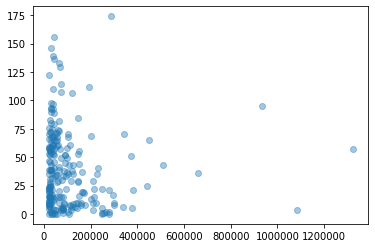

In [227]:
g  = plt.scatter(\
            y=crime['Total_crime'], 
            x=crime['total_enr'], 
            alpha=0.4)  

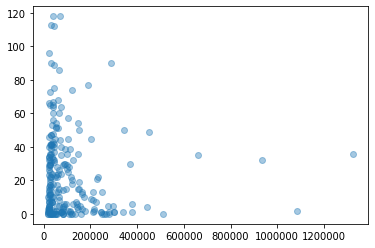

In [228]:
g  = plt.scatter(\
            y=crime['burglary'], 
            x=crime['total_enr'], 
            alpha=0.4) 

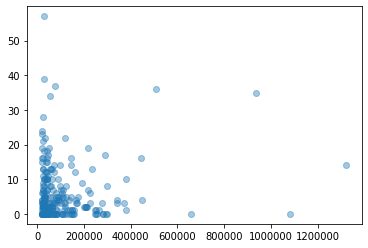

In [229]:
g  = plt.scatter(\
            y=crime['vehicle'], 
            x=crime['total_enr'], 
            alpha=0.4) 

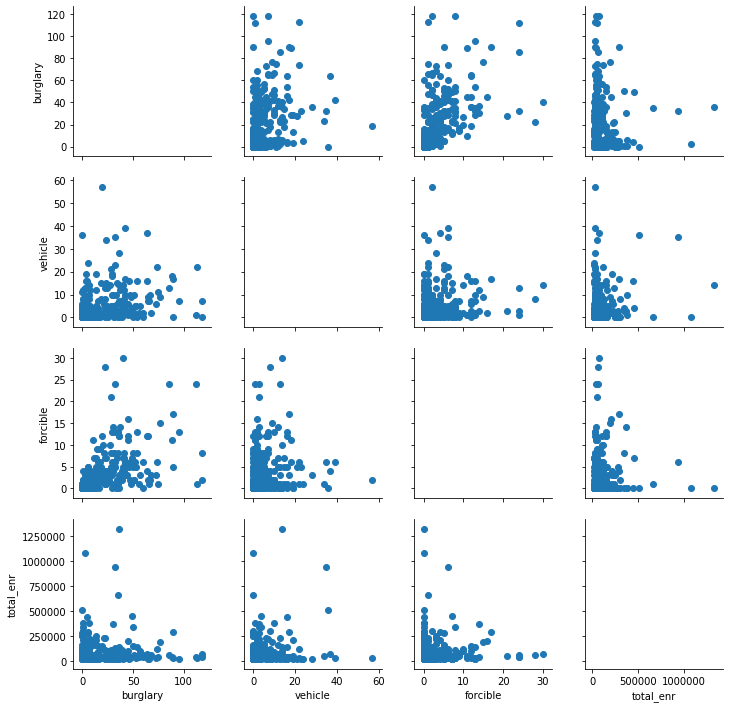

In [230]:
grid_columns = ["burglary", "vehicle", "forcible", "total_enr"]
g = sns.PairGrid(crime[grid_columns])

g.map_offdiag(plt.scatter);

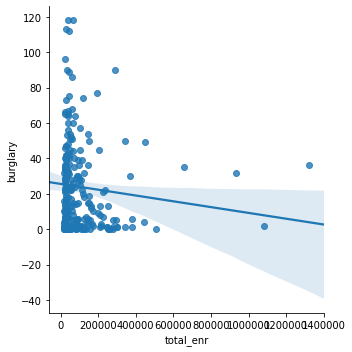

In [231]:
gr = sns.lmplot(data=crime, y="burglary", x="total_enr")

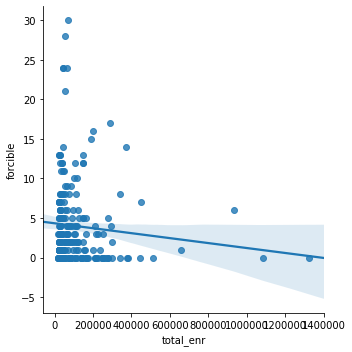

In [232]:
gr = sns.lmplot(data=crime, y="forcible", x="total_enr")

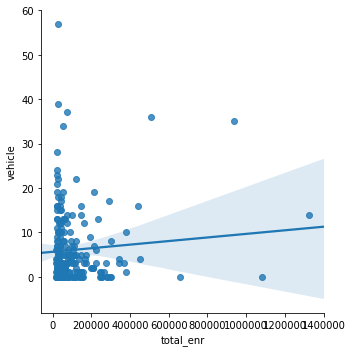

In [233]:
gr = sns.lmplot(data=crime, y="vehicle", x="total_enr")

IDEA 3:

From the three codes above (216, 217, and 218), we can see that the burglary and forcible variables negatively correlate with the total enrollment variable. Only the vehicle variable shows a positive correlation with the enrollment number. So, is there a possibility that the bigger the campus, the weaker it is in terms of vehicle protection rather than building protection or sexual assault prevention?